In [4]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

print("import succesfull")

import succesfull


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [6]:

df.head(2)

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89


In [7]:

df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [8]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [10]:
y_df =df.set_index('timeStamp')

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

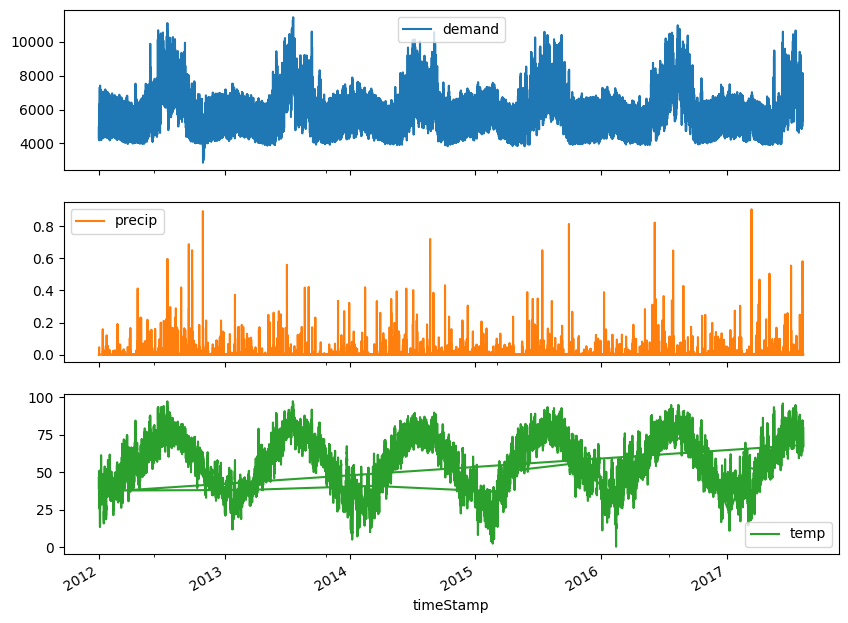

In [12]:
y_df.plot(subplots = True)

In [13]:
def printStats(dataframe):
  print("Rows     :", dataframe.shape[0])
  print("Columns  :", dataframe.shape[1])
  print("\n Features \n", dataframe.columns.to_list())
  print("\n Missing Values \n", dataframe.isnull().any())
  print("\n Unique Values \n", dataframe.nunique())
     

In [14]:
printStats(df)

Rows     : 49205
Columns  : 4

 Features 
 ['timeStamp', 'demand', 'precip', 'temp']

 Missing Values 
 timeStamp    False
demand        True
precip        True
temp          True
dtype: bool

 Unique Values 
 timeStamp    49205
demand       40972
precip        1004
temp          7580
dtype: int64


### missing values treatment

In [15]:
#this method of null checking is quite efficient
#most of the null and nan values are objects so if your column data type is not object then youcan use this
df.query('demand !=demand')


,timeStamp,demand,precip,temp
49124,2012-03-11 02:00:00,NaN,0.0000,37.78
49125,2013-03-10 02:00:00,NaN,0.0000,38.18
49126,2014-03-09 02:00:00,NaN,0.0000,40.86
49127,2015-03-08 02:00:00,NaN,0.0000,36.96
49128,2015-03-11 11:00:00,NaN,0.0000,49.95
...,...,...,...,...
49200,2017-08-12 02:00:00,NaN,0.0000,70.84
49201,2017-08-12 03:00:00,NaN,0.0000,70.57
49202,2017-08-12 04:00:00,NaN,0.0000,69.89
49203,2017-08-12 05:00:00,NaN,0.0000,68.59


In [16]:
## data is at hour level

In [20]:

#demand and temp dont chnage rapidly so we can do a forwd fill so that the missing data point will be filled by the previous datapoint
df['demand']= df['demand'].fillna(method = 'ffill')
df['temp'] = df['temp'].fillna(method = 'ffill')
df['precip'] = df['precip'].fillna(method = 'ffill')

C:\Users\Pratyush.Thakur\AppData\Local\Temp\ipykernel_18472\3539280431.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\Pratyush.Thakur\AppData\Local\Temp\ipykernel_18472\3539280431.py:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\Pratyush.Thakur\AppData\Local\Temp\ipykernel_18472\3539280431.py:4: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [21]:

print('Missing Values Check:',df.isnull().any().count())
print('Missing Values Colun:',df.isnull().any())

Missing Values Check: 4
Missing Values Colun: timeStamp    False
demand       False
precip       False
temp         False
dtype: bool


C:\Users\Pratyush.Thakur\AppData\Local\Temp\ipykernel_18472\1261430592.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

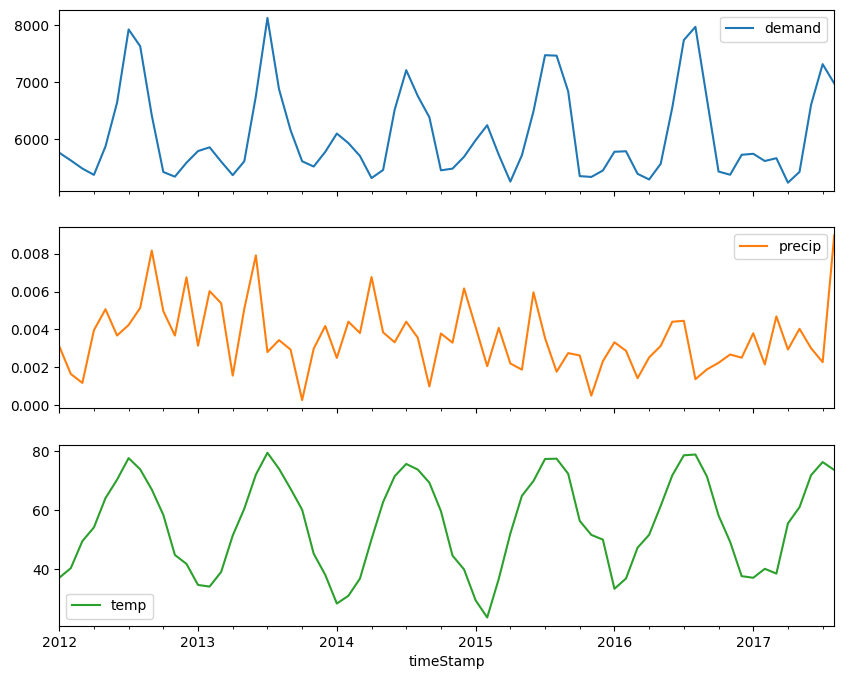

In [23]:
y_df.resample('M').mean().plot(subplots = True)

In [26]:
ny_df_monthly = y_df.resample('M').mean()

C:\Users\Pratyush.Thakur\AppData\Local\Temp\ipykernel_18472\2001401583.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [29]:

import pmdarima as pm
#by default auto arima uses AIC,the lower aic the model is good
model = pm.auto_arima(ny_df_monthly['demand'],
                      m = 12, seasonal = True,
                      start_p = 0,start_q=0,max_order=4,test='adf',error_action = 'ignore',
                      suppress_warnings =True,
                      stepwise =True,trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1101.053, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1008.797, Time=0.19 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.859, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.502, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1023.722, Time=0.71 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1002.162, Time=2.72 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=1000.198, Time=0.33 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,0,0)(1,0,2)[12] intercept   : AIC=993.083, Ti

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   68
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -489.588
Date:                                 Tue, 01 Oct 2024   AIC                            991.177
Time:                                         13:18:26   BIC                           1004.494
Sample:                                     01-31-2012   HQIC                           996.453
                                          - 08-31-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3681.4009    766.429      4.803      0.000    2179.228    5183.574
ar.L1          0.8623      0.120      7.188      0.000       0.627       1.097
ar.L2         -0.4707      0.138     -3.423      0.001      -0.740      -0.201
ma.S.L12       0.8894      0.134      6.658      0.000       0.628       1.151
ma.S.L24       0.4435      0.204      2.179      0.029       0.045       0.842
sigma2      8.823e+04   1.48e+04      5.964      0.000    5.92e+04    1.17e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 6.60
Prob(Q):                              0.80   Prob(JB):                         0.04
Heteroskedasticity (H):               0.70   Skew:                             0.55
Prob(H) (two-sided):                  0.41   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:

train = ny_df_monthly[(ny_df_monthly.index.get_level_values(0)>='2012-01-31') & (ny_df_monthly.index.get_level_values(0)<='2017-04-30')]
test = ny_df_monthly[(ny_df_monthly.index.get_level_values(0)>'2017-04-30')]

In [33]:
test.shape

(4, 3)

In [34]:
model.fit(train['demand'])

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

In [35]:
forecast = model.predict(n_periods = 4, return_conf_int= True)
## second parameter returns the value in the range , where we have one upper and one lower bound

In [36]:
forecast

(2017-05-31    5322.118116
 2017-06-30    6205.604241
 2017-07-31    7187.965226
 2017-08-31    7302.377009
 Freq: ME, dtype: float64,
 array([[4724.96267302, 5919.27355927],
        [5401.98234411, 7009.22613752],
        [6361.5138247 , 8014.41662788],
        [6471.18875765, 8133.56526038]]))

In [37]:
forecast_df = pd.DataFrame(forecast[0], index = test.index, columns = ['Prediction'])

In [38]:
forecast_df

,Prediction
timeStamp,
2017-05-31,5322.118116
2017-06-30,6205.604241
2017-07-31,7187.965226
2017-08-31,7302.377009


<Axes: xlabel='timeStamp'>

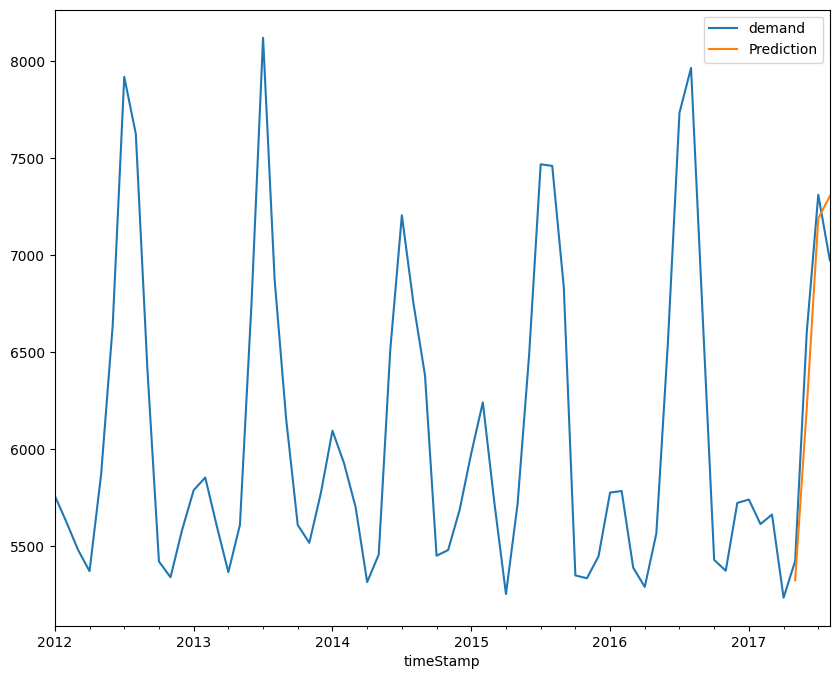

In [39]:

pd.concat([ny_df_monthly['demand'],forecast_df],axis=1).plot()
     

In [40]:

forecast1 = model.predict(n_periods=8,return_conf_int=True)

In [41]:
# NOW CANNOT take index directly from the test dataframe so using this daterange
forecast_range = pd.date_range(start = '2017-05-31', periods = 8 , freq = 'M')

C:\Users\Pratyush.Thakur\AppData\Local\Temp\ipykernel_18472\1658419131.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [42]:
forecast1_df =pd.DataFrame(forecast1[0],index=forecast_range,columns=['Prediction'])

<Axes: >

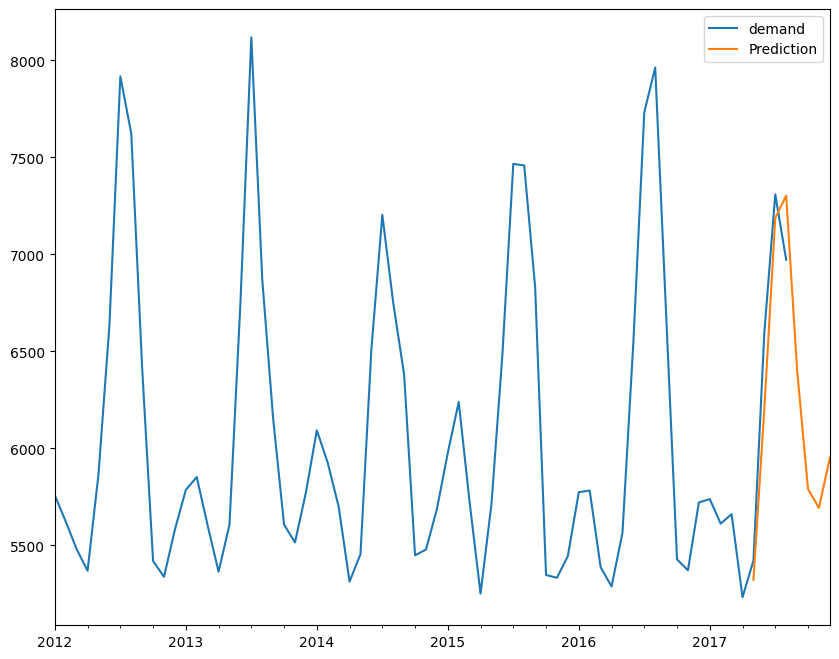

In [43]:

pd.concat([ny_df_monthly['demand'],forecast1_df],axis=1).plot()

In [47]:
## plotting confidence interval 

lower = pd.Series(forecast1[1][:,0], index = forecast_range)
upper = pd.Series(forecast1[1][:,1], index= forecast_range)

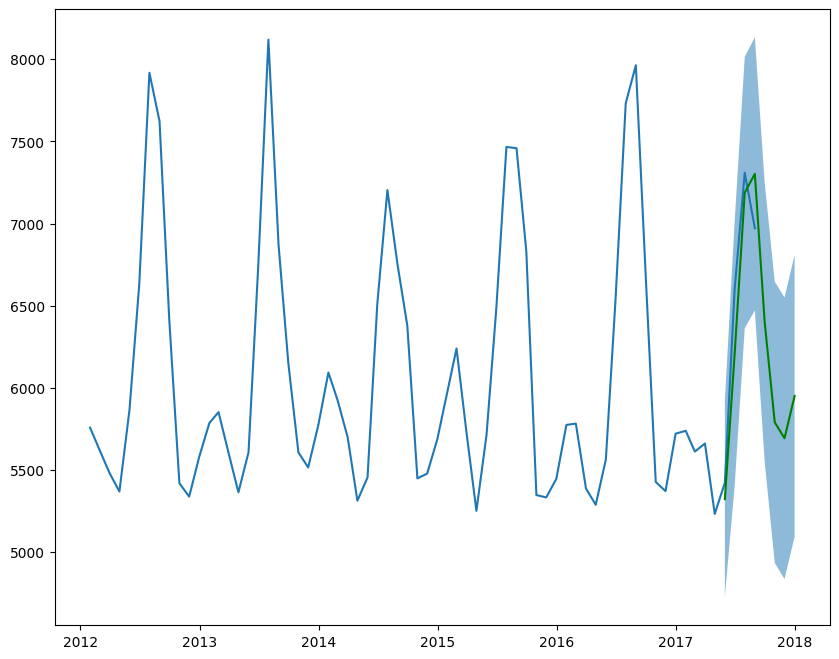

In [49]:
plt.plot(ny_df_monthly['demand'])
plt.plot(forecast1_df,color = 'green')
plt.fill_between(forecast_range, lower, upper, alpha = 0.5)

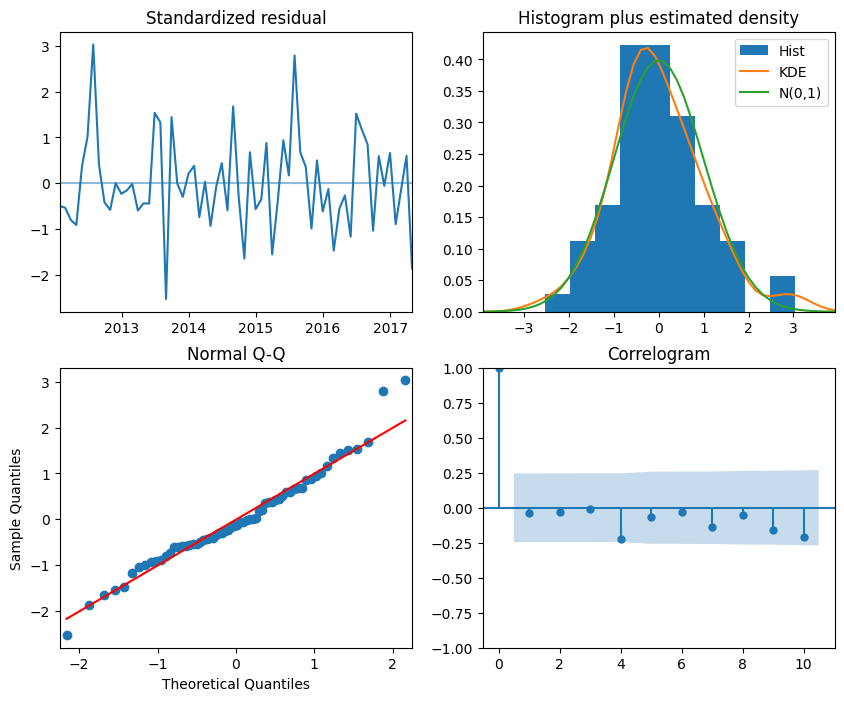

In [51]:
out = model.plot_diagnostics()

# in first graph we can conclude that residualas are not having some seonality or anything
## so our model is working fairly well
## also errors are distributed normally